In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import wordcloud
import tkinter as tk
from tkinter import ttk  # For themed widgets (more modern look)


In [3]:
def wc(text):
    wordcloud = wordcloud.WordCloud().generate(text)
    return wordcloud

In [4]:
def prepare_text_for_wordcloud(text, exclude_words=None, additional_stopwords=None):
    """
    Prepares text data for use with a word cloud generator.

    Args:
        text: A string or a list of strings representing the input text.
        exclude_words (optional): A list of words to exclude entirely.
        additional_stopwords (optional): A list of additional stopwords to remove.

    Returns:
        A dictionary (Counter object) where keys are words and values are their frequencies.
        Returns an empty dictionary if the input text is invalid.
    """

    if not isinstance(text, (str, list)):  # Validate input type
        print("Invalid input text. Please provide a string or a list of strings.")
        return {} # Return an empty dictionary

    if isinstance(text, list):
        text = " ".join(text)  # Join list of strings into one string

    text = text.lower() # convert to lowercase

    # Remove punctuation and special characters (except apostrophes within words)
    text = re.sub(r"[^\w\s']", '', text)

    words = text.split()

    # Standard English stopwords (you can customize this)
    stopwords = set([
        "the", "a", "an", "and", "or", "but", "is", "are", "was", "were",
        "i", "you", "he", "she", "it", "we", "they",
        "my", "your", "his", "her", "its", "our", "their",
        "me", "him", "her", "us", "them",
        "this", "that", "these", "those",
        "am", "been", "being", "have", "has", "had",
        "do", "does", "did", "will", "would", "should", "can", "could", "might", "must",
        "of", "at", "to", "in", "for", "with", "by", "on", "as", "from", "about", "into", "through", "during", "before", "after", "above", "below", "up", "down", "out", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "many", "some", "what", "which", "who", "whom", "whose", "more", "most", "other", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "one", "two", "first", "last", "said", "get", "make", "go", "see", "know", "take", "would", "could", "should", "really", "much", "good", "great", "well", "best", "better", "little", "big", "small", "new", "old", "long", "short", "high", "low", "early", "late", "young", "old", "true", "false", "right", "wrong"
    ])

    if additional_stopwords:
        stopwords.update(additional_stopwords) # add user defined stopwords to the list

    word_counts = Counter()
    for word in words:
        if word not in stopwords and (exclude_words is None or word not in exclude_words):
            word_counts[word] += 1

    return word_counts

In [5]:
# Example usage:

Txt_List = []

text_1 = "This is a sample text. This text has some repeated words.  This is a test. Test test test."
word_frequencies = prepare_text_for_wordcloud(text_1)
Txt_List.append(text_1)
print(word_frequencies)

Counter({'test': 4, 'text': 2, 'sample': 1, 'repeated': 1, 'words': 1})


In [6]:
text_2 = ["This", "is", "a", "sample", "text.", "This", "text", "has", "some", "repeated", "words.",  "This", "is", "a", "test.", "Test", "test", "test."]
word_frequencies_list = prepare_text_for_wordcloud(text_2)
print(word_frequencies_list)
Txt_List.append(text_2)

exclude = ["test"]
word_frequencies_exclude = prepare_text_for_wordcloud(text_2, exclude_words = exclude)
print(word_frequencies_exclude)
Txt_List.append(text_2)

additional = ["sample"]
word_frequencies_additional = prepare_text_for_wordcloud(text_2, additional_stopwords = additional)
print(word_frequencies_additional)
Txt_List.append(text_2)

invalid_input = 123
word_frequencies_invalid = prepare_text_for_wordcloud(invalid_input)
print(word_frequencies_invalid)
Txt_List.append(text_2)

Counter({'test': 4, 'text': 2, 'sample': 1, 'repeated': 1, 'words': 1})
Counter({'text': 2, 'sample': 1, 'repeated': 1, 'words': 1})
Counter({'test': 4, 'text': 2, 'repeated': 1, 'words': 1})
Invalid input text. Please provide a string or a list of strings.
{}


In [7]:
text_3 = input("Enter sentence for word cloud:")
Txt_List.append(text_3)

In [14]:
def on_selection(event):
    global selected_item   # Get the selected item
    selected_item = my_combobox.get()
    print("Selected item:", selected_item)
    # Do something with the selected item here.
    # For example, you could update a label or perform a calculation.
    result_label.config(text=f"You selected: {selected_item}")
    return selected_item
    
def confirm_button():
    try:
        text = selected_item
        print("Confirmed text:", text)  # Print to verify
        chooser.destroy()  # Close the window
        # Now you can use the 'text' variable (it will be available after mainloop)
        
        
        # ... your code to use the selected text ...
        
    except NameError:
        print("No selection made yet.")
        result_label.config(text="Please make a selection first.")
    

# Sample list of items
my_list = Txt_List

# Create the main window
chooser = tk.Tk()
chooser.title("Choose the text to graph")
chooser.geometry("700x150")
chooser.configure(bg="#134074")

# Create the Combobox (Dropdown)
my_combobox = ttk.Combobox(chooser, font=("DejaVu Sans Bold", 9), values=my_list)
my_combobox.current(0)  # Set the default selection (optional)
my_combobox.bind("<<ComboboxSelected>>", on_selection)  # Bind to selection event
my_combobox.pack(pady=5)
my_combobox.pack()

# Show the selected item in a label
result_label = tk.Label(chooser, font=("DejaVu Sans Bold", 11), text="No selection yet",bg="#134074", fg="white")
result_label.pack(pady=5)

# Add confirm button:
confirm_button = tk.Button(chooser,font=("DejaVu Sans Bold", 11), text="Please confirm",padx=50,pady=2, command=confirm_button)
confirm_button.place(relx=0.90, rely=0.75, anchor="se")
confirm_button.pack()

selected_item = ""  # Initialize selected_item
    
chooser.mainloop()

Selected item: This is a sample text. This text has some repeated words. This is a test. Test test test.
Confirmed text: This is a sample text. This text has some repeated words. This is a test. Test test test.


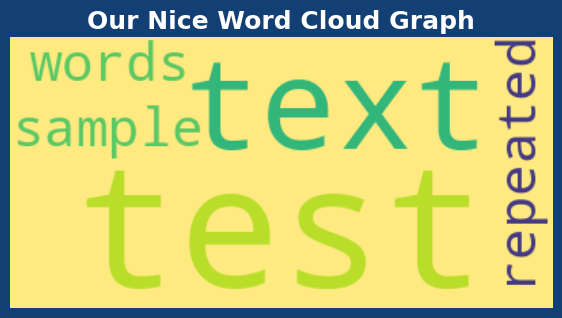

In [ ]:
input = selected_item
wordcloud_generator = wordcloud.WordCloud(colormap = "viridis",background_color="#FFEA81").generate(input)  

plt.figure(figsize=(7,7), facecolor="#134074")
# plt.plot(color="white")
plt.title("Our Nice Word Cloud Graph", font="DejaVu Sans", fontsize=18, fontweight="bold", color="white")

plt.imshow(wordcloud_generator, interpolation = 'bilinear')
plt.axis('off')
plt.show()